In [18]:
####################################################################
###    This is the PYTHON version of program 6.4 from page 203 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model (including births and deaths) with         #
### (event-driven) demographic stochasticity approximated using    #
### the tau-leap method and assuming Poisson distributions.		   #
###																   #
### This is a more complex stochastic model as 6 events are		   #
### possible: infection, recovery, birth, death of susceptible,    #
### death of infected, death of recovered.						   #
###											   					   #
### Note: by default we are using a very small population size 	   #
### to highlight the stochasticity.				   				   #
####################################################################

In [19]:
import numpy as np
import pylab as pl

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*mu is the per capita death rate.

*tao is the time-step that is taken each time, which can potentially contain multiple Poisson distributed events.

*X0 is the initial number or density of susceptible individuals.

*Y0 is the initial number or density of infectious individuals.

*N is the population size -- assumed to be constant. We assume Z(0)=N-X(0)-Y(0)

In [20]:
beta=1.0
gamma=1/10.0
mu=5e-4
#N0=5000.0
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
N0=50.0
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0
tau=1.0
INPUT = np.array((X0,Y0,Z0))

In [21]:
def stoc_eqs(INP): 
	V = INP
	Rate=np.zeros((6))
	Change=np.zeros((6,3))
	N=V[0]+V[1]+V[2]
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
    
	for i in range(6):
		Num=np.random.poisson(Rate[i]*tau);
		## Make sure things don't go negative
		Use=min([Num, V[np.where(Change[i,:]<0)]]);
		V=V+Change[i,:]*Use;
	return(V)

In [22]:
def Stoch_Iteration(INPUT):
	lop=0
	S=[0]
	I=[0]
	R=[0]
	for lop in T:
		res = stoc_eqs(INPUT)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		INPUT=res
	return [S,I,R]

In [23]:
T=np.arange(0.0, ND, tau)
[S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  app.launch_new_instance()


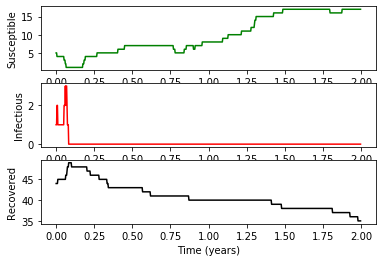

In [24]:
pl.subplot(311)
pl.plot(tT, tS, 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Susceptible')
pl.subplot(312)
pl.plot(tT, tI, 'r')
#pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.subplot(313)
pl.plot(tT, tR, 'k')
pl.xlabel ('Time (years)')
pl.ylabel ('Recovered')
pl.show()